In [117]:
## Import Libraies

## import all main libraries automatically with pyforest
# !pip install pyforest
import pyforest

## main libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker

# !pip install squarify
import squarify as sq

import scipy.stats as stats
from scipy.cluster.hierarchy import linkage, dendrogram
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt
from datetime import datetime
from pyclustertend import hopkins

## pre-processing
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer, KNNImputer

## feature Selection
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression

## scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

## regression/prediction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

## ann
from sklearn.neural_network import MLPRegressor

## classification
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, plot_importance

## metrics
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve 
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

## model selection
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_validate

## MLearning
from sklearn.pipeline import make_pipeline, Pipeline
import optuna
from sklearn.naive_bayes import GaussianNB

## clevers
# !pip install -U pandas-profiling --user
import pandas_profiling
from pandas_profiling.report.presentation.flavours.html.templates import create_html_assets

import ipywidgets
from ipywidgets import interact
import missingno as msno 
# !pip install wordcloud
from wordcloud import WordCloud

# !pip install termcolor
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint
# grey red green yellow blue magenta cyan white (on_grey ..)
# bold dark underline blink reverse concealed
# cprint("Have a first look to:","blue","on_grey", attrs=['bold'])

## plotly and cufflinks
import plotly 
import plotly.express as px
import cufflinks as cf
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [118]:
## Some Useful User-Defined-Functions

###############################################################################

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", 'yellow', attrs=['bold']), df.shape,'\n', 
          colored('*'*100, 'red', attrs=['bold']),
          colored("\nInfo:\n",'yellow', attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", 'yellow', attrs=['bold']), df.nunique(),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", 'yellow', attrs=['bold']), missing_values(df),'\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", 'yellow', attrs=['bold']), *list(df.columns), sep='\n- ') 
    print(colored('*'*100, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')
    
    print(colored("Columns after rename:", 'yellow', attrs=['bold']), *list(df.columns), sep='\n- ')
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    
###############################################################################
## To view summary information about the columns

def summary(column):
    print(colored("Column: ",'yellow', attrs=['bold']), column)
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing values: ", 'yellow', attrs=['bold']), df[column].isnull().sum())
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing values(%): ", 'yellow', attrs=['bold']), round(df[column].isnull().sum()/df.shape[0]*100, 2))
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Unique values: ", 'yellow', attrs=['bold']), df[column].nunique())
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Value counts: \n", 'yellow', attrs=['bold']), df[column].value_counts(dropna = False), sep='')
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    
###############################################################################
                    
def multicolinearity_control(df):                    
    df_temp = df.corr()
    count = 'Done'
    feature =[]
    collinear= []
    for col in df_temp.columns:
        for i in df_temp.index:
            if abs(df_temp[col][i] > .8 and df_temp[col][i] < 1):
                    feature.append(col)
                    collinear.append(i)
                    cprint(f"multicolinearity alert in between {col} - {i}", "red", attrs=["bold"])
    else:
        cprint(f"There is NO multicollinearity problem.", "blue", attrs=["bold"])                     
                    
###############################################################################

def duplicate_values(df):
    print(colored("Duplicate check...", 'yellow', attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored(" Duplicates were dropped!"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')     

###############################################################################
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('Missing value control...', 'yellow', attrs=['bold']),'\n',
              colored('If there is a missing value above the limit you have given, the relevant columns are dropped and an information is given.'), sep='')

###############################################################################

def drop_null(df, limit):
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'were null and dropped')
            df.drop(i, axis=1, inplace=True)
    print(colored('Last shape after missing value control:', 'yellow', attrs=['bold']), df.shape, '\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')

###############################################################################

def shape_control():
    print('df.shape:', df.shape)
    print('X.shape:', X.shape)
    print('y.shape:', y.shape)
    print('X_train.shape:', X_train.shape)
    print('y_train.shape:', y_train.shape)
    print('X_test.shape:', X_test.shape)
    print('y_test.shape:', y_test.shape)

###############################################################################  

## show values in bar graphic
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
###############################################################################   

In [243]:
df_train = pd.read_csv("train.csv").copy()
df_train.head()

id  song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0   0        212990.000         0.642         0.857   0.707             0.002   
1   1               NaN         0.055         0.733   0.836             0.001   
2   2        193213.000           NaN         0.188   0.784            -0.003   
3   3        249893.000         0.489         0.585   0.553             0.001   
4   4        165969.000         0.493           NaN   0.741             0.002   

     key  liveness  loudness  audio_mode  speechiness   tempo  time_signature  \
0 10.000       NaN    -5.619           0        0.083 158.386               4   
1  8.000     0.436    -5.237           1        0.127 102.753               3   
2  5.000     0.170    -4.952           0        0.052 178.686               3   
3  0.000     0.095    -7.894           0        0.036 128.716               3   
4 10.000     0.095    -2.684           0        0.051 121.928               4   

   audio_valence  song_popularity  
0          0.735                0  
1          0.712                1  
2          0.426                0  
3          0.454                0  
4          0.741                0

In [244]:
df_train.shape

(40000, 15)

In [245]:
df_test = pd.read_csv("test.csv").copy()
df_test.head()

id  song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0   0        308523.000         0.020           NaN   0.909             0.001   
1   1        200011.000         0.070         0.731   0.445             0.002   
2   2        279758.000         0.811         0.569   0.125             0.899   
3   3        249197.000           NaN         0.872   0.557             0.001   
4   4               NaN         0.766         0.625   0.711             0.000   

     key  liveness  loudness  audio_mode  speechiness   tempo  time_signature  \
0    NaN     0.113    -8.890           0        0.083 126.129               4   
1 10.000     0.139    -6.301           0        0.062  86.448               3   
2  0.000     0.227   -11.542           0        0.042  99.544               3   
3  4.000     0.325    -7.906           1        0.047 123.064               4   
4  8.000     0.308       NaN           0        0.129  88.703               3   

   audio_valence  
0          0.400  
1          0.499  
2          0.565  
3          0.906  
4          0.936

In [246]:
df_test.shape

(10000, 14)

# Train EDA

In [247]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40000 non-null  int64  
 1   song_duration_ms  35899 non-null  float64
 2   acousticness      36008 non-null  float64
 3   danceability      35974 non-null  float64
 4   energy            36025 non-null  float64
 5   instrumentalness  36015 non-null  float64
 6   key               35935 non-null  float64
 7   liveness          35914 non-null  float64
 8   loudness          36043 non-null  float64
 9   audio_mode        40000 non-null  int64  
 10  speechiness       40000 non-null  float64
 11  tempo             40000 non-null  float64
 12  time_signature    40000 non-null  int64  
 13  audio_valence     40000 non-null  float64
 14  song_popularity   40000 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 4.6 MB


In [248]:
df_train.describe().T

count       mean       std       min        25%  \
id               40000.000  19999.500 11547.150     0.000   9999.750   
song_duration_ms 35899.000 193165.848 45822.128 25658.000 166254.500   
acousticness     36008.000      0.276     0.298    -0.014      0.040   
danceability     35974.000      0.571     0.190     0.044      0.425   
energy           36025.000      0.684     0.213    -0.002      0.539   
instrumentalness 36015.000      0.037     0.150    -0.004      0.001   
key              35935.000      5.043     3.373     0.000      2.000   
liveness         35914.000      0.199     0.152     0.028      0.112   
loudness         36043.000     -7.408     3.877   -32.118     -9.578   
audio_mode       40000.000      0.321     0.467     0.000      0.000   
speechiness      40000.000      0.094     0.084     0.015      0.039   
tempo            40000.000    116.563    26.168    62.056     96.995   
time_signature   40000.000      3.394     0.524     2.000      3.000   
audio_valence    40000.000      0.581     0.237     0.013      0.399   
song_popularity  40000.000      0.364     0.481     0.000      0.000   

                        50%        75%        max  
id                19999.500  29999.250  39999.000  
song_duration_ms 186660.000 215116.000 491671.000  
acousticness          0.141      0.482      1.065  
danceability          0.608      0.718      0.957  
energy                0.704      0.871      1.040  
instrumentalness      0.002      0.003      1.075  
key                   5.000      8.000     11.000  
liveness              0.136      0.213      1.065  
loudness             -6.345     -4.621     -0.877  
audio_mode            0.000      1.000      1.000  
speechiness           0.056      0.119      0.561  
tempo               113.796    128.517    219.164  
time_signature        3.000      4.000      5.000  
audio_valence         0.599      0.760      1.023  
song_popularity       0.000      1.000      1.000

In [249]:
missing_values(df_train)

Missing_Number  Missing_Percent
song_duration_ms            4101            0.103
liveness                    4086            0.102
key                         4065            0.102
danceability                4026            0.101
acousticness                3992            0.100
instrumentalness            3985            0.100
energy                      3975            0.099
loudness                    3957            0.099

In [173]:
first_looking(df_train)

Shape:(40000, 15)
****************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40000 non-null  int64  
 1   song_duration_ms  35899 non-null  float64
 2   acousticness      36008 non-null  float64
 3   danceability      35974 non-null  float64
 4   energy            36025 non-null  float64
 5   instrumentalness  36015 non-null  float64
 6   key               35935 non-null  float64
 7   liveness          35914 non-null  float64
 8   loudness          36043 non-null  float64
 9   audio_mode        40000 non-null  int64  
 10  speechiness       40000 non-null  float64
 11  tempo             40000 non-null  float64
 12  time_signature    40000 non-null  int64  
 13  audio_valence     40000 non-null  float64
 14  song_pop

In [174]:
duplicate_values(df_train)

Duplicate check...
There are no duplicates
****************************************************************************************************


In [175]:
multicolinearity_control(df_train)

There is NO multicollinearity problem.


In [272]:
def fillna_mean(df):
    for i in df.columns:
        median = df[i].median()
        df[i].fillna(median, inplace = True)
    return missing_values(df)

In [273]:
fillna_mean(df_train)

Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []

In [283]:
df_train.describe().T

count       mean       std        min        25%  \
id               25224.000  20036.377 11558.904      0.000  10000.750   
song_duration_ms 25224.000 189375.522 31638.240 105465.000 169271.000   
acousticness     25224.000      0.254     0.269     -0.011      0.052   
danceability     25224.000      0.587     0.173      0.057      0.480   
energy           25224.000      0.694     0.190      0.116      0.574   
instrumentalness 25224.000      0.002     0.001     -0.002      0.001   
key              25224.000      5.017     3.194      0.000      2.000   
liveness         25224.000      0.144     0.053      0.028      0.110   
loudness         25224.000     -6.855     2.863    -15.543     -8.554   
audio_mode       25224.000      0.319     0.466      0.000      0.000   
speechiness      25224.000      0.076     0.054      0.015      0.038   
tempo            25224.000    114.603    23.126     63.479     97.255   
time_signature   25224.000      3.409     0.525      2.000      3.000   
audio_valence    25224.000      0.600     0.230      0.020      0.420   
song_popularity  25224.000      0.355     0.479      0.000      0.000   

                        50%        75%        max  
id                20048.500  30018.250  39999.000  
song_duration_ms 186660.000 205891.250 273765.000  
acousticness          0.141      0.414      1.005  
danceability          0.608      0.712      0.948  
energy                0.704      0.860      1.040  
instrumentalness      0.002      0.003      0.006  
key                   5.000      8.000     11.000  
liveness              0.133      0.167      0.330  
loudness             -6.345     -4.744     -0.877  
audio_mode            0.000      1.000      1.000  
speechiness           0.053      0.094      0.239  
tempo               112.979    126.783    175.796  
time_signature        3.000      4.000      5.000  
audio_valence         0.619      0.773      1.023  
song_popularity       0.000      1.000      1.000

In [275]:
outliers = []
def detect_outliers_iqr(df):
    for i in df.columns:
        q1, q3 = df[i].quantile([0.25, 0.75])
       
        IQR = q3-q1
        lwr_bound = q1-(1.5*IQR)
        upr_bound = q3+(1.5*IQR)
        for j in df[i]: 
            if (j<lwr_bound or j>upr_bound):
                for z in list(df[i][df[i] == j].index):
                    outliers.append(z)
    for outlier_index in set(outliers):
        df.drop(outlier_index, axis = 0, inplace = True)
    return df

In [277]:
detect_outliers_iqr(df_train)

id  song_duration_ms  acousticness  danceability  energy  \
0          0        212990.000         0.642         0.857   0.707   
3          3        249893.000         0.489         0.585   0.553   
4          4        165969.000         0.493         0.608   0.741   
5          5        188891.000         0.036         0.826   0.805   
7          7        196202.000         0.260         0.813   0.554   
...      ...               ...           ...           ...     ...   
39993  39993        147151.000         0.107         0.616   0.923   
39995  39995        237799.000         0.141         0.749   0.511   
39996  39996        191119.000         0.067         0.673   0.890   
39997  39997        160879.000         0.877         0.409   0.293   
39999  39999        196475.000         0.007         0.355   0.995   

       instrumentalness    key  liveness  loudness  audio_mode  speechiness  \
0                 0.002 10.000     0.136    -5.619           0        0.083   
3                 0.001  0.000     0.095    -7.894           0        0.036   
4                 0.002 10.000     0.095    -2.684           0        0.051   
5                -0.000  4.000     0.121    -6.123           0        0.039   
7                 0.000  8.000     0.277    -7.794           0        0.207   
...                 ...    ...       ...       ...         ...          ...   
39993             0.003  6.000     0.066    -4.017           0        0.186   
39995             0.003  0.000     0.174    -8.854           0        0.078   
39996             0.001  5.000     0.123    -7.799           0        0.189   
39997             0.002 10.000     0.111   -15.379           0        0.031   
39999             0.002  1.000     0.201    -4.875           0        0.081   

        tempo  time_signature  audio_valence  song_popularity  
0     158.386               4          0.735                0  
3     128.716               3          0.454                0  
4     121.928               4          0.741                0  
5     115.679               4          0.709                0  
7     158.627               3          0.663                1  
...       ...             ...            ...              ...  
39993 118.633               4          0.393                1  
39995 168.263               3          0.178                0  
39996 110.685               3          0.791                0  
39997  99.556               3          0.178                1  
39999 101.975               3          0.589                0  

[25224 rows x 15 columns]

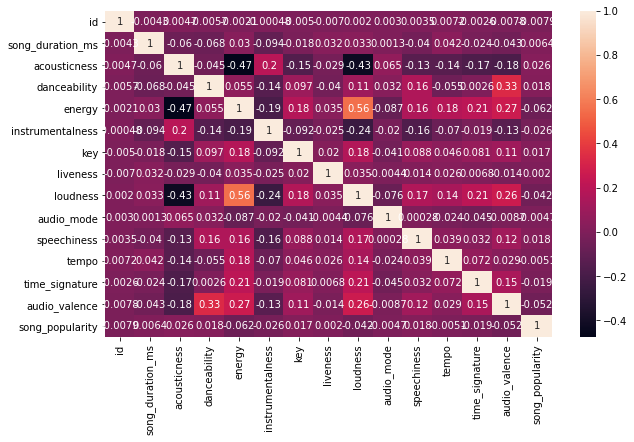

In [284]:
sns.heatmap(df_train.corr(), annot=True);

In [287]:
df_train.drop("id", axis = 1)

song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0            212990.000         0.642         0.857   0.707             0.002   
3            249893.000         0.489         0.585   0.553             0.001   
4            165969.000         0.493         0.608   0.741             0.002   
5            188891.000         0.036         0.826   0.805            -0.000   
7            196202.000         0.260         0.813   0.554             0.000   
...                 ...           ...           ...     ...               ...   
39993        147151.000         0.107         0.616   0.923             0.003   
39995        237799.000         0.141         0.749   0.511             0.003   
39996        191119.000         0.067         0.673   0.890             0.001   
39997        160879.000         0.877         0.409   0.293             0.002   
39999        196475.000         0.007         0.355   0.995             0.002   

         key  liveness  loudness  audio_mode  speechiness   tempo  \
0     10.000     0.136    -5.619           0        0.083 158.386   
3      0.000     0.095    -7.894           0        0.036 128.716   
4     10.000     0.095    -2.684           0        0.051 121.928   
5      4.000     0.121    -6.123           0        0.039 115.679   
7      8.000     0.277    -7.794           0        0.207 158.627   
...      ...       ...       ...         ...          ...     ...   
39993  6.000     0.066    -4.017           0        0.186 118.633   
39995  0.000     0.174    -8.854           0        0.078 168.263   
39996  5.000     0.123    -7.799           0        0.189 110.685   
39997 10.000     0.111   -15.379           0        0.031  99.556   
39999  1.000     0.201    -4.875           0        0.081 101.975   

       time_signature  audio_valence  song_popularity  
0                   4          0.735                0  
3                   3          0.454                0  
4                   4          0.741                0  
5                   4          0.709                0  
7                   3          0.663                1  
...               ...            ...              ...  
39993               4          0.393                1  
39995               3          0.178                0  
39996               3          0.791                0  
39997               3          0.178                1  
39999               3          0.589                0  

[25224 rows x 14 columns]

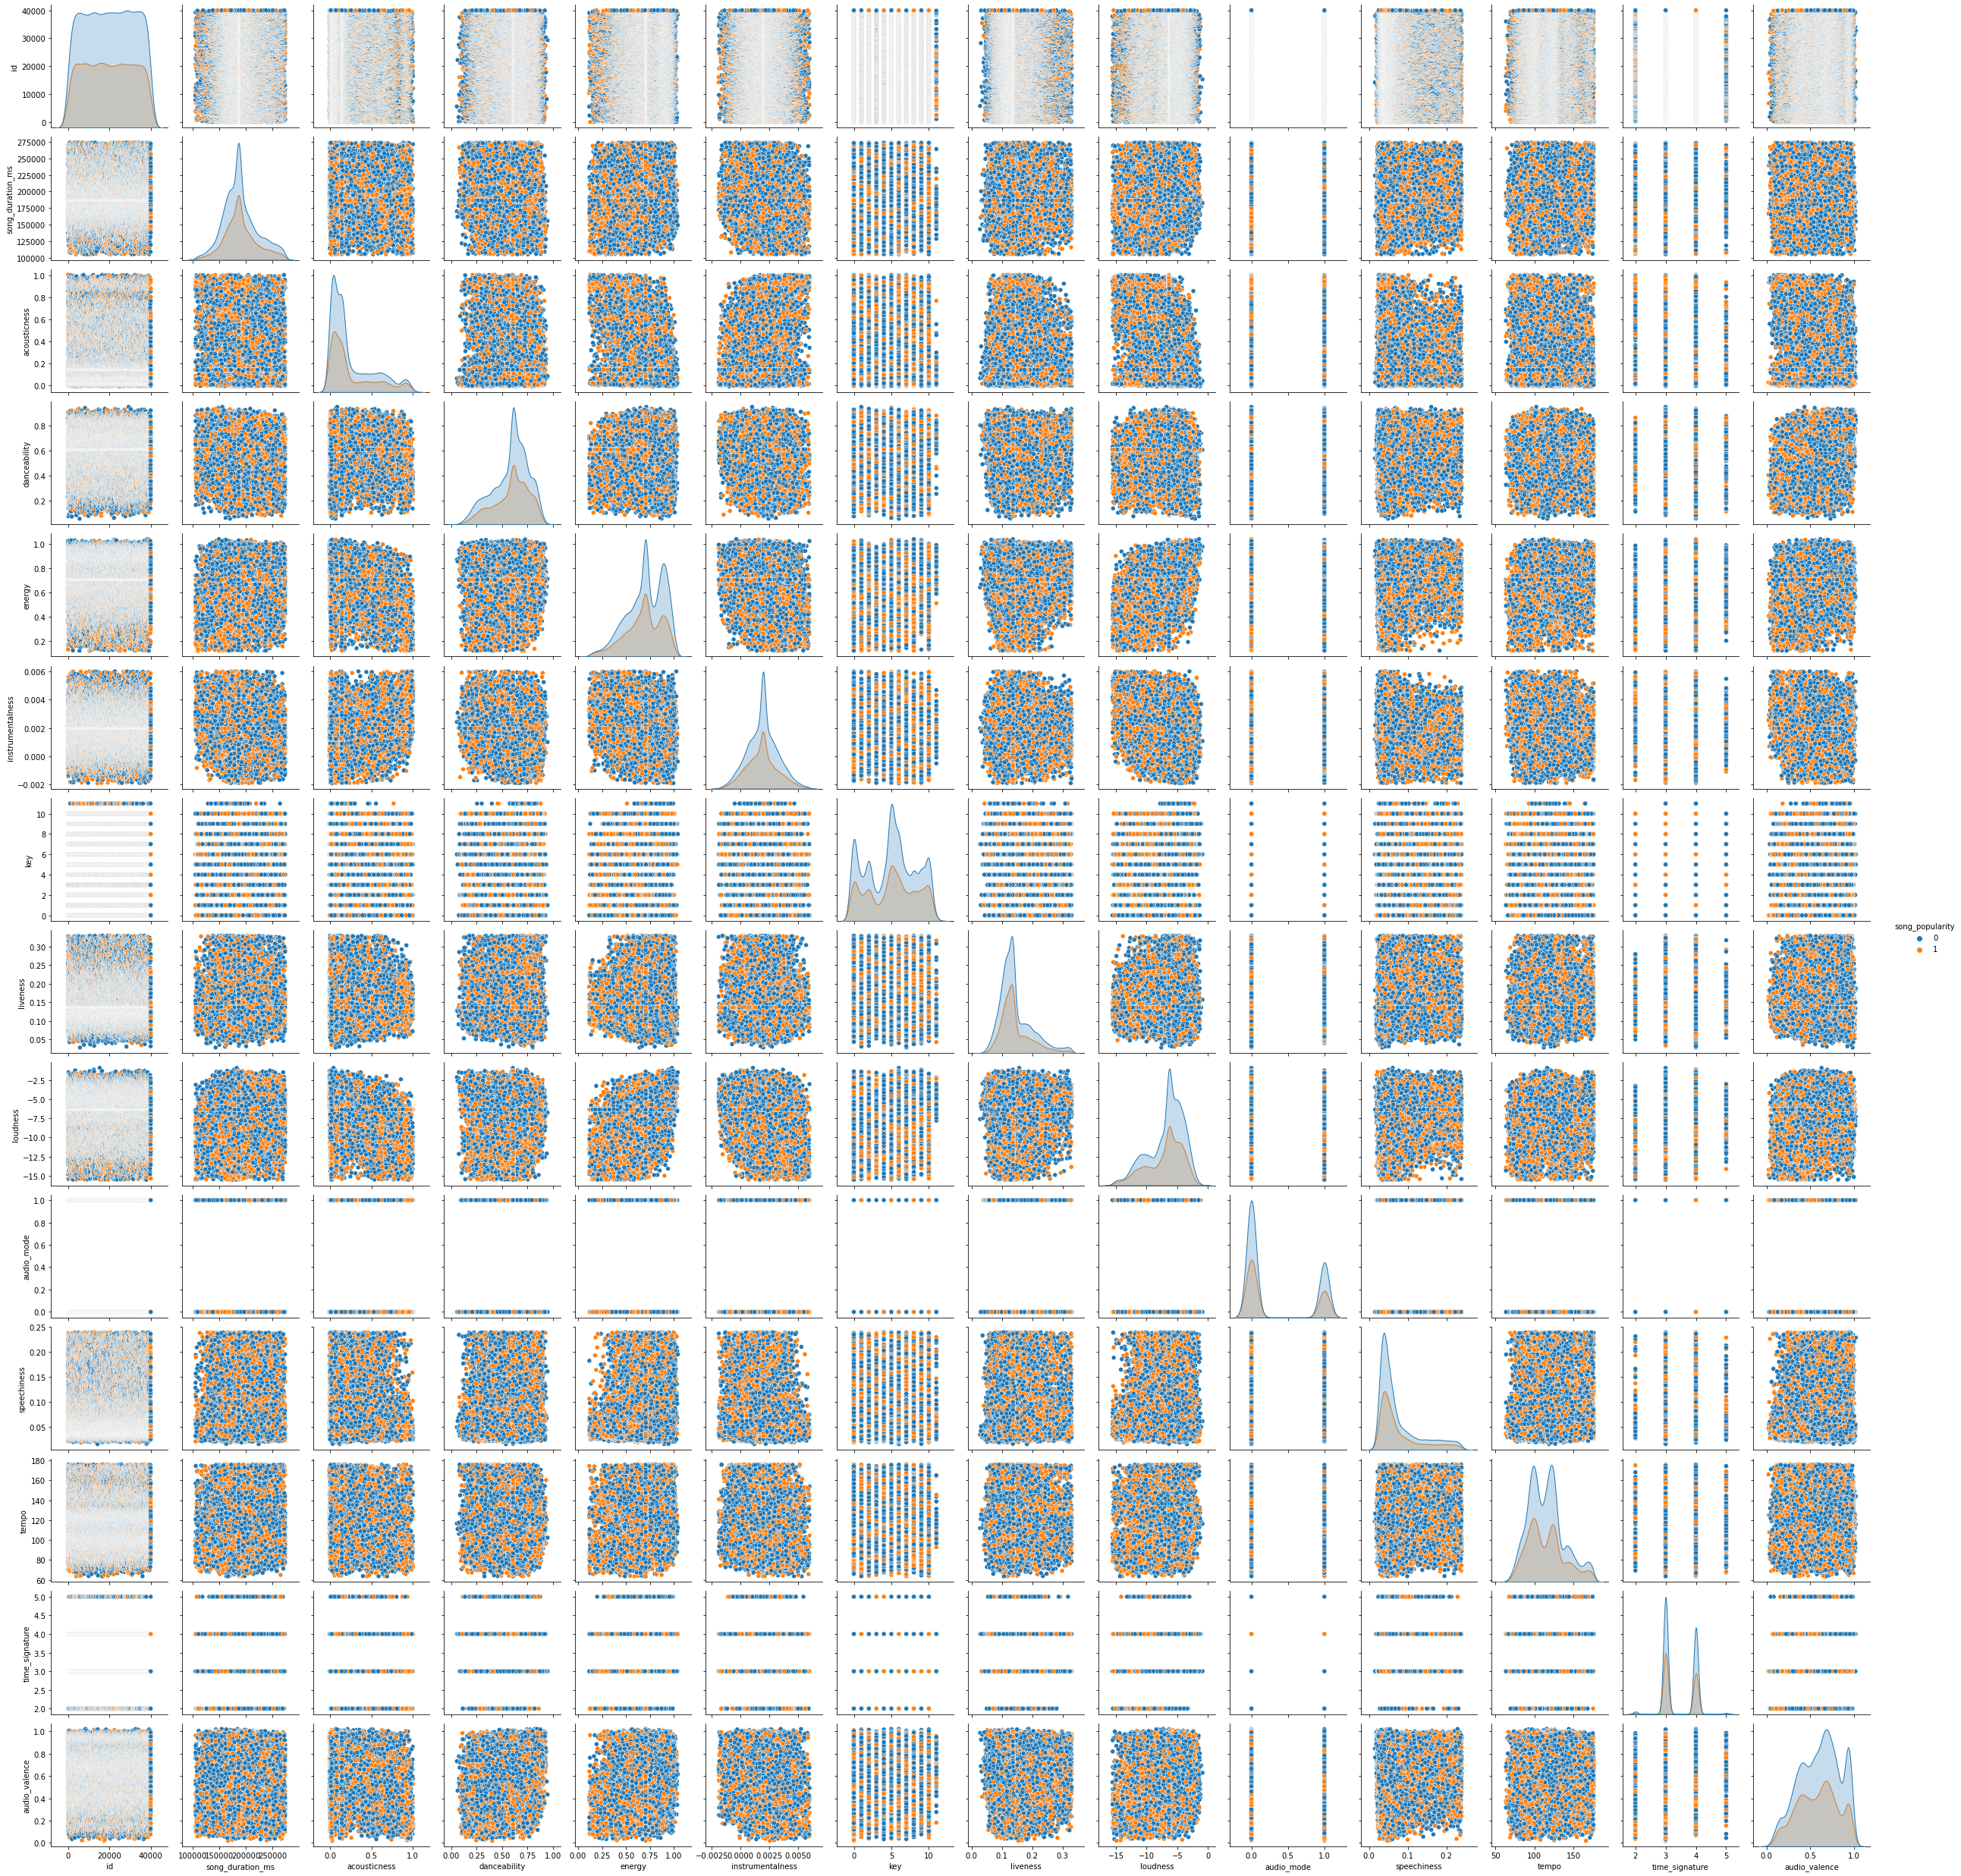

In [288]:
sns.pairplot(df_train, hue="song_popularity" )

In [312]:
#df_train.reset_index(inplace = True)
df_train.drop(["index", "id"],axis = 1, inplace = True)
df_train

song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0            212990.000         0.642         0.857   0.707             0.002   
1            249893.000         0.489         0.585   0.553             0.001   
2            165969.000         0.493         0.608   0.741             0.002   
3            188891.000         0.036         0.826   0.805            -0.000   
4            196202.000         0.260         0.813   0.554             0.000   
...                 ...           ...           ...     ...               ...   
25219        147151.000         0.107         0.616   0.923             0.003   
25220        237799.000         0.141         0.749   0.511             0.003   
25221        191119.000         0.067         0.673   0.890             0.001   
25222        160879.000         0.877         0.409   0.293             0.002   
25223        196475.000         0.007         0.355   0.995             0.002   

         key  liveness  loudness  audio_mode  speechiness   tempo  \
0     10.000     0.136    -5.619           0        0.083 158.386   
1      0.000     0.095    -7.894           0        0.036 128.716   
2     10.000     0.095    -2.684           0        0.051 121.928   
3      4.000     0.121    -6.123           0        0.039 115.679   
4      8.000     0.277    -7.794           0        0.207 158.627   
...      ...       ...       ...         ...          ...     ...   
25219  6.000     0.066    -4.017           0        0.186 118.633   
25220  0.000     0.174    -8.854           0        0.078 168.263   
25221  5.000     0.123    -7.799           0        0.189 110.685   
25222 10.000     0.111   -15.379           0        0.031  99.556   
25223  1.000     0.201    -4.875           0        0.081 101.975   

       time_signature  audio_valence  song_popularity  
0                   4          0.735                0  
1                   3          0.454                0  
2                   4          0.741                0  
3                   4          0.709                0  
4                   3          0.663                1  
...               ...            ...              ...  
25219               4          0.393                1  
25220               3          0.178                0  
25221               3          0.791                0  
25222               3          0.178                1  
25223               3          0.589                0  

[25224 rows x 14 columns]

In [289]:
df_test

id  song_duration_ms  acousticness  danceability  energy  \
0        0        308523.000         0.020           NaN   0.909   
1        1        200011.000         0.070         0.731   0.445   
2        2        279758.000         0.811         0.569   0.125   
3        3        249197.000           NaN         0.872   0.557   
4        4               NaN         0.766         0.625   0.711   
...    ...               ...           ...           ...     ...   
9995  9995        196204.000         0.084         0.823   0.442   
9996  9996        218343.000         0.105         0.684   0.849   
9997  9997        188434.000         0.753         0.784   0.498   
9998  9998        173044.000         0.864         0.373   0.476   
9999  9999        157896.000         0.020         0.720     NaN   

      instrumentalness    key  liveness  loudness  audio_mode  speechiness  \
0                0.001    NaN     0.113    -8.890           0        0.083   
1                0.002 10.000     0.139    -6.301           0        0.062   
2                0.899  0.000     0.227   -11.542           0        0.042   
3                0.001  4.000     0.325    -7.906           1        0.047   
4                0.000  8.000     0.308       NaN           0        0.129   
...                ...    ...       ...       ...         ...          ...   
9995             0.003  1.000     0.124    -8.682           1        0.041   
9996             0.002  6.000     0.107    -4.946           0        0.034   
9997             0.134  6.000     0.088   -11.813           1        0.030   
9998             0.000 10.000     0.122   -12.371           0        0.191   
9999             0.038  2.000     0.139    -4.965           1        0.053   

       tempo  time_signature  audio_valence  
0    126.129               4          0.400  
1     86.448               3          0.499  
2     99.544               3          0.565  
3    123.064               4          0.906  
4     88.703               3          0.936  
...      ...             ...            ...  
9995  98.265               4          0.784  
9996 103.950               4          0.851  
9997 119.091               4          0.483  
9998 103.048               3          0.519  
9999 109.874               4          0.971  

[10000 rows x 14 columns]

In [290]:
missing_values(df_test)

Missing_Number  Missing_Percent
energy                      1055            0.105
loudness                    1026            0.103
liveness                    1006            0.101
instrumentalness            1000            0.100
key                          992            0.099
danceability                 976            0.098
song_duration_ms             957            0.096
acousticness                 950            0.095

In [291]:
fillna_mean(df_test)

Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []

In [300]:
outliers = []
def detect_outliers_iqr(df):
    for i in df.columns:
        q1, q3 = df[i].quantile([0.25, 0.75])
       
        IQR = q3-q1
        lwr_bound = q1-(1.5*IQR)
        upr_bound = q3+(1.5*IQR)
        for j in df[i]: 
            if (j<lwr_bound or j>upr_bound):
                for z in list(df[i][df[i] == j].index):
                    outliers.append(z)
    for outlier_index in set(outliers):
        if outlier_index>10000 == True:
            print(outlier_index)

In [301]:
detect_outliers_iqr(df_test)

In [302]:
outliers = []
def detect_outliers_iqr(df):
    for i in df.columns:
        q1, q3 = df[i].quantile([0.25, 0.75])
       
        IQR = q3-q1
        lwr_bound = q1-(1.5*IQR)
        upr_bound = q3+(1.5*IQR)
        for j in df[i]: 
            if (j<lwr_bound or j>upr_bound):
                for z in list(df[i][df[i] == j].index):
                    outliers.append(z)
    for outlier_index in set(outliers):
        df.drop(outlier_index, axis = 0, inplace = True)
    return df

In [303]:
detect_outliers_iqr(df_test)

id  song_duration_ms  acousticness  danceability  energy  \
1        1        200011.000         0.070         0.731   0.445   
4        4        186196.000         0.766         0.625   0.711   
5        5        169177.000         0.142         0.606   0.472   
6        6        204494.000         0.225         0.793   0.591   
14      14        186196.000         0.415         0.601   0.603   
...    ...               ...           ...           ...     ...   
9992  9992        170075.000         0.084         0.664   0.874   
9994  9994        201768.000         0.212         0.512   0.687   
9995  9995        196204.000         0.084         0.823   0.442   
9996  9996        218343.000         0.105         0.684   0.849   
9998  9998        173044.000         0.864         0.373   0.476   

      instrumentalness    key  liveness  loudness  audio_mode  speechiness  \
1                0.002 10.000     0.139    -6.301           0        0.062   
4                0.000  8.000     0.308    -6.346           0        0.129   
5                0.003  7.000     0.128    -5.144           1        0.034   
6                0.003  5.000     0.274    -6.355           1        0.219   
14               0.002  5.000     0.121    -4.881           0        0.020   
...                ...    ...       ...       ...         ...          ...   
9992             0.002  6.000     0.128    -4.059           0        0.098   
9994            -0.001 10.000     0.136    -6.346           1        0.045   
9995             0.003  1.000     0.124    -8.682           1        0.041   
9996             0.002  6.000     0.107    -4.946           0        0.034   
9998             0.000 10.000     0.122   -12.371           0        0.191   

       tempo  time_signature  audio_valence  
1     86.448               3          0.499  
4     88.703               3          0.936  
5    121.232               3          0.606  
6    137.397               3          0.942  
14   112.701               4          0.761  
...      ...             ...            ...  
9992 128.284               3          0.815  
9994 146.096               3          0.761  
9995  98.265               4          0.784  
9996 103.950               4          0.851  
9998 103.048               3          0.519  

[6196 rows x 14 columns]

In [304]:
df_test.drop("id", axis = 1)

song_duration_ms  acousticness  danceability  energy  instrumentalness  \
1           200011.000         0.070         0.731   0.445             0.002   
4           186196.000         0.766         0.625   0.711             0.000   
5           169177.000         0.142         0.606   0.472             0.003   
6           204494.000         0.225         0.793   0.591             0.003   
14          186196.000         0.415         0.601   0.603             0.002   
...                ...           ...           ...     ...               ...   
9992        170075.000         0.084         0.664   0.874             0.002   
9994        201768.000         0.212         0.512   0.687            -0.001   
9995        196204.000         0.084         0.823   0.442             0.003   
9996        218343.000         0.105         0.684   0.849             0.002   
9998        173044.000         0.864         0.373   0.476             0.000   

        key  liveness  loudness  audio_mode  speechiness   tempo  \
1    10.000     0.139    -6.301           0        0.062  86.448   
4     8.000     0.308    -6.346           0        0.129  88.703   
5     7.000     0.128    -5.144           1        0.034 121.232   
6     5.000     0.274    -6.355           1        0.219 137.397   
14    5.000     0.121    -4.881           0        0.020 112.701   
...     ...       ...       ...         ...          ...     ...   
9992  6.000     0.128    -4.059           0        0.098 128.284   
9994 10.000     0.136    -6.346           1        0.045 146.096   
9995  1.000     0.124    -8.682           1        0.041  98.265   
9996  6.000     0.107    -4.946           0        0.034 103.950   
9998 10.000     0.122   -12.371           0        0.191 103.048   

      time_signature  audio_valence  
1                  3          0.499  
4                  3          0.936  
5                  3          0.606  
6                  3          0.942  
14                 4          0.761  
...              ...            ...  
9992               3          0.815  
9994               3          0.761  
9995               4          0.784  
9996               4          0.851  
9998               3          0.519  

[6196 rows x 13 columns]

In [313]:
df_test.reset_index(inplace = True)
df_test.drop(["index", "id"],axis = 1, inplace = True)
df_test

song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0           200011.000         0.070         0.731   0.445             0.002   
1           186196.000         0.766         0.625   0.711             0.000   
2           169177.000         0.142         0.606   0.472             0.003   
3           204494.000         0.225         0.793   0.591             0.003   
4           186196.000         0.415         0.601   0.603             0.002   
...                ...           ...           ...     ...               ...   
6191        170075.000         0.084         0.664   0.874             0.002   
6192        201768.000         0.212         0.512   0.687            -0.001   
6193        196204.000         0.084         0.823   0.442             0.003   
6194        218343.000         0.105         0.684   0.849             0.002   
6195        173044.000         0.864         0.373   0.476             0.000   

        key  liveness  loudness  audio_mode  speechiness   tempo  \
0    10.000     0.139    -6.301           0        0.062  86.448   
1     8.000     0.308    -6.346           0        0.129  88.703   
2     7.000     0.128    -5.144           1        0.034 121.232   
3     5.000     0.274    -6.355           1        0.219 137.397   
4     5.000     0.121    -4.881           0        0.020 112.701   
...     ...       ...       ...         ...          ...     ...   
6191  6.000     0.128    -4.059           0        0.098 128.284   
6192 10.000     0.136    -6.346           1        0.045 146.096   
6193  1.000     0.124    -8.682           1        0.041  98.265   
6194  6.000     0.107    -4.946           0        0.034 103.950   
6195 10.000     0.122   -12.371           0        0.191 103.048   

      time_signature  audio_valence  
0                  3          0.499  
1                  3          0.936  
2                  3          0.606  
3                  3          0.942  
4                  4          0.761  
...              ...            ...  
6191               3          0.815  
6192               3          0.761  
6193               4          0.784  
6194               4          0.851  
6195               3          0.519  

[6196 rows x 13 columns]